In [1]:
import pandas as pd # for dataset evaluation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Uber_dataset

data=pd.read_csv("uber-raw-data-sep14.csv")

In [3]:
data

Date/Time      Lat      Lon    Base
0          9/1/2014 0:01:00  40.2201 -74.0021  B02512
1          9/1/2014 0:01:00  40.7500 -74.0027  B02512
2          9/1/2014 0:03:00  40.7559 -73.9864  B02512
3          9/1/2014 0:06:00  40.7450 -73.9889  B02512
4          9/1/2014 0:11:00  40.8145 -73.9444  B02512
...                     ...      ...      ...     ...
1028131  9/30/2014 22:57:00  40.7668 -73.9845  B02764
1028132  9/30/2014 22:57:00  40.6911 -74.1773  B02764
1028133  9/30/2014 22:58:00  40.8519 -73.9319  B02764
1028134  9/30/2014 22:58:00  40.7081 -74.0066  B02764
1028135  9/30/2014 22:58:00  40.7140 -73.9496  B02764

[1028136 rows x 4 columns]

### Date/Time: The date and time of a CAB pickup.
### Lat(Latitude): The latitude of the CAB pickup (in degrees)
### Lon(Longitude): The longitude of the Uber pickup. (in degrees)
### Base: The TLC (Taxi and Limousine Commission) base _*company code*_ affiliated with the Uber pickup.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [5]:
data.describe()

Lat           Lon
count  1.028136e+06  1.028136e+06
mean   4.073922e+01 -7.397182e+01
std    4.082861e-02  5.831413e-02
min    3.998970e+01 -7.477360e+01
25%    4.072040e+01 -7.399620e+01
50%    4.074180e+01 -7.398310e+01
75%    4.076120e+01 -7.396280e+01
max    4.134760e+01 -7.271630e+01

In [6]:
data.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [7]:
groups=data[['Lat','Lon']]

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(groups)

KMeans(n_clusters=2)

In [9]:
kmeans.inertia_  #inertia for k value = 2

3244.997137279746

Text(0, 0.5, 'Inertia')

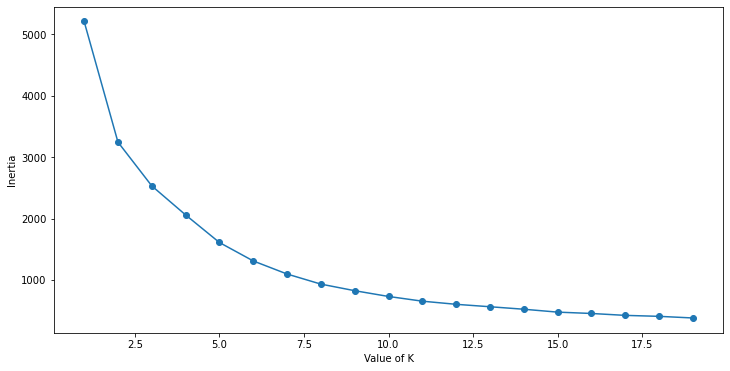

In [22]:
SSDist = [] #to store the values of different Sum of Square distances
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(groups)
    SSDist.append(kmeans.inertia_)

    
    
# converting the results into a dataframe and plotting them to get an ELBOW PLOT
frame = pd.DataFrame({'Cluster':range(1,20), 'SSDist':SSDist})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSDist'], marker='o')
plt.xlabel('Value of K')
plt.ylabel('Inertia')

    

In [92]:
kmeans=KMeans(n_clusters=6, init='k-means++')
kmeans.fit(groups)

KMeans(n_clusters=6)

In [93]:
centroids=kmeans.cluster_centers_
centroids

array([[ 40.73223343, -73.99762577],
       [ 40.66805063, -73.76136067],
       [ 40.69740762, -74.20372448],
       [ 40.76799699, -73.97082024],
       [ 40.68794774, -73.9637939 ],
       [ 40.79765781, -73.87398946]])

In [96]:
clocation=pd.DataFrame(centroids)
clocation

0          1
0  40.732233 -73.997626
1  40.668051 -73.761361
2  40.697408 -74.203724
3  40.767997 -73.970820
4  40.687948 -73.963794
5  40.797658 -73.873989

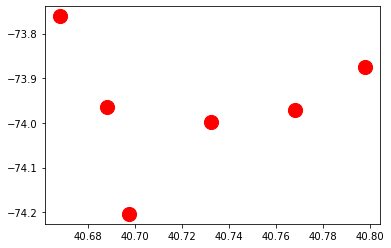

In [97]:
plt.scatter(clocation[0],clocation[1],marker="o", color='Red', s=200)
plt.show()

# No relevance is shown in the scatter plot. 
# We need to visualise the co-ordinates in the google map

# import gmplot, folium

For Jupiter Notebook: <br>
Use Anaconda Prompt to run the following commands for google map dependency. <br>
_You need to have Git installed on your PC for cloning gmplot repository_ <br>
1. <br>
conda install -c mlgill gmplot <br>
2. <br>
anaconda search -t conda gmplot <br>
3. <br>
pip install gmplot <br>
<br>
pip install folium <br>
<br>

_4. {Not required}_ <br>

*For local installation we need to clone the Github repository, use the following command: <br> 
git clone https://github.com/vgm64/gmplot <br>

Now, you have the dependency on your PC at your Jupiter Notebook's Directory. <br> 
Locate setup.py in gmplot folder of your Jupiter Notebook's Directory. <br>
Run, <br>

python setup.py install *
_

_Restart_ your Jupiter Notebook's Shell
Now you can import folium


In [62]:
import folium

In [98]:
# Converting centroid into lists
centroid = clocation.values.tolist()
# Plotting the centroids on google map using Folium library.
map = folium.Map(location=[40.797981, -73.8749402], zoom_start = 10)
for point in range(0, len(centroid)):
    folium.Marker(centroid[point], popup = centroid[point]).add_to(map)
map